Reference: Renewable Energy 147 (2020) 2913--2931

This paper presents a thermodynamic analysis and techno-economic assessment of a novel hybrid solar-biomass power-generation system con guration composed of an externally red gas-turbine (EFGT) fuelled by biomass (wood chips) and a bottoming organic Rankine cycle (ORC) plant. 

![figure-1](figure-1.png "Power plant")

In [1]:
!pip install CoolProp

  Using cached CoolProp-6.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (555 bytes)
Using cached CoolProp-6.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.3 MB)


In [2]:
from CoolProp.CoolProp import PropsSI

In [14]:
TA_K = 25+273.15
pA_Pa = 101325

pressureRatio = (10)**0.5

fluid = 'air'

mdot_Air_kgPerS = 10

In [15]:
hA = PropsSI('H','T',TA_K,'P',pA_Pa,fluid)
sA = PropsSI('S','T',TA_K,'P',pA_Pa,fluid)
vA = 1/PropsSI('D','T',TA_K,'P',pA_Pa,fluid)

In [24]:
pB_Pa = pA_Pa*pressureRatio
sB = sA

hB = PropsSI('H','S',sB,'P',pB_Pa,fluid)
vB = 1/PropsSI('D','S',sB,'P',pB_Pa,fluid)
TB_K = PropsSI('T','S',sB,'P',pB_Pa,fluid)

In [17]:
pC_Pa = pB_Pa
TC_K = TA_K

hC = PropsSI('H','T',TC_K,'P',pC_Pa,fluid)
sC = PropsSI('S','T',TC_K,'P',pC_Pa,fluid)
vC = 1/PropsSI('D','T',TC_K,'P',pC_Pa,fluid)

QBC_J = mdot_Air_kgPerS*(hB - hC); print(QBC_J)

1171534.414495686


In [21]:
pD_Pa = pC_Pa*pressureRatio
sD = sC

hD = PropsSI('H','S',sD,'P',pD_Pa,fluid)
vD = 1/PropsSI('D','S',sD,'P',pD_Pa,fluid)
TD_K = PropsSI('T','S',sD,'P',pD_Pa,fluid)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'T (K)')

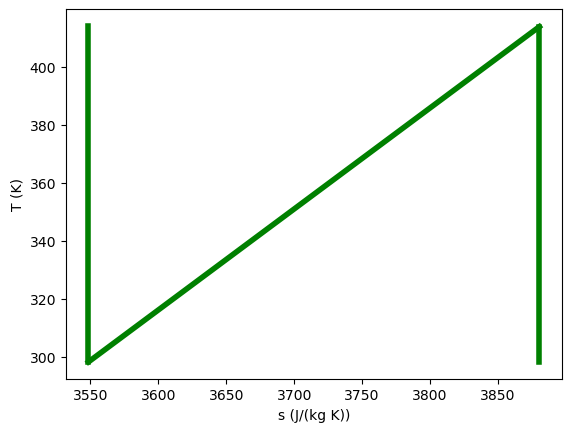

In [27]:
plt.figure()
plt.clf()

# plot for the ideal cycle
plt.plot([sA, sB], [TA_K, TB_K], 'g-', lw=4) 
plt.plot([sB, sC], [TB_K, TC_K], 'g-', lw=4) 
plt.plot([sC, sD], [TC_K, TD_K], 'g-', lw=4) 

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')

# plt.savefig('cryogenic-cycle-T-s.png')

#Tsat2 = np.linspace(200, 400, 1000) # range of temperatures
#plt.plot(svap, Tsat2, 'r-')
#plt.plot(sliq, Tsat2, 'r-')

In [55]:
# For now we can assume a Qdot_in = Qdot_DE that comes from the furnace. 
# Later on we can compute the biomass input

Qdot_DE_W = 8e6

In [63]:
hE = hD + Qdot_DE_W/mdot_Air_kgPerS; print(hE)
pE_Pa = pD_Pa

# The max temp that a Brayton cycle can run at is 1500 K
TE_K = PropsSI('T','H',hE,'P',pE_Pa,fluid); print(TE_K)
sE = PropsSI('S','H',hE,'P',pE_Pa,fluid)
vE = 1/PropsSI('D','H',hE,'P',pE_Pa,fluid)

1340658.0456939496
1145.1652705365952


In [64]:
sF = sE
pF_Pa = pA_Pa # pE_Pa*.4

hF = PropsSI('H','S',sF,'P',pF_Pa,fluid)
TF_K = PropsSI('T','S',sF,'P',pF_Pa,fluid); print(TF_K)
vF = 1/PropsSI('D','S',sF,'P',pF_Pa,fluid)

631.5239141964252


In [95]:
QdotFG_W = 1.5e6

pG_Pa = pF_Pa

hG = hF - (QdotFG_W/mdot_Air_kgPerS)
# TG_K = 200 + 273.15
# hG = PropsSI('H','P',pG_Pa,'T',TG_K,fluid)
sG = PropsSI('S','P',pG_Pa,'H',hG,fluid)
vG = 1/PropsSI('D','P',pG_Pa,'H',hG,fluid)
TG_K = PropsSI('T','P',pG_Pa,'H',hG,fluid); print(TG_K)

487.6291895029021


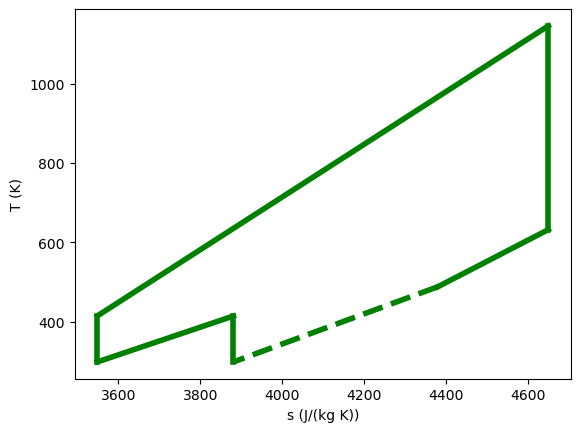

In [96]:
plt.figure()
plt.clf()

# plot for the ideal cycle
plt.plot([sA, sB], [TA_K, TB_K], 'g-', lw=4) 
plt.plot([sB, sC], [TB_K, TC_K], 'g-', lw=4) 
plt.plot([sC, sD], [TC_K, TD_K], 'g-', lw=4) 
plt.plot([sD, sE], [TD_K, TE_K], 'g-', lw=4) 
plt.plot([sE, sF], [TE_K, TF_K], 'g-', lw=4) 
plt.plot([sF, sG], [TF_K, TG_K], 'g-', lw=4) 
plt.plot([sG, sA], [TG_K, TA_K], 'g--', lw=4) 

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')

plt.savefig('brayton-T-s.png')

#Tsat2 = np.linspace(200, 400, 1000) # range of temperatures
#plt.plot(svap, Tsat2, 'r-')
#plt.plot(sliq, Tsat2, 'r-')

In [108]:
# thermal storage

# here you have to write INCOMP:: before the fluid name, in this case
# DowQ in order to call the fluid. It is an incompressible fluid. 
fluidHeatTransfer = 'INCOMP::DowQ'

TH_K = 200+273.15

# State H, exiting the tank and entering the heat exchanger
pH = 5e5

hH = PropsSI('H','T',TH_K,'P',pH,fluidHeatTransfer)
sH = PropsSI('S','T',TH_K,'P',pH,fluidHeatTransfer)

print(TH_K - TG_K)

-14.479189502902102


In [109]:
TI_K = 340+273.15
pI = pH

print(TI_K - TF_K)

-18.373914196425176


In [110]:
hI = PropsSI('H','T',TI_K,'P',pI,fluidHeatTransfer)
sI = PropsSI('S','T',TI_K,'P',pI,fluidHeatTransfer)

In [111]:
mdot_HI_kgPerS = QdotFG_W/(hI - hH); print(mdot_HI_kgPerS)

4.439935475853545


In [140]:
# organic Rankine cycle, let's try CO2 as a working fluid

fluid_ORC = 'CO2'

Q1 = 0 # quality
P1 = 60e5 # Pa
h1 = PropsSI('H','P',P1,'Q',Q1,fluid_ORC)
s1 = PropsSI('S','P',P1,'Q',Q1,fluid_ORC)
T1 = PropsSI('T','P',P1,'Q',Q1,fluid_ORC); print(T1)

295.127900991809


In [141]:
P2 = 5*P1 # Pa
s2 = s1

h2 = PropsSI('H','P',P2,'S',s2,fluid_ORC)
s2 = PropsSI('S','P',P2,'S',s2,fluid_ORC)
T2 = PropsSI('T','P',P2,'S',s2,fluid_ORC); print(T2)

324.3179543289205


In [170]:
mdot_23_kgPerS = 8

h3 = h2 + (QdotFG_W/mdot_23_kgPerS)
P3 = P2

T3 = PropsSI('T','H',h3,'P',P3,fluid_ORC)
s3 = PropsSI('S','H',h3,'P',P3,fluid_ORC)

print(T3 - TF_K)

-213.0609881236793


In [176]:
Q4 = 1
P4 = P1

T4 = PropsSI('T','Q',Q4,'P',P4,fluid_ORC)
h4 = PropsSI('H','Q',Q4,'P',P4,fluid_ORC)
s4 = PropsSI('S','Q',Q4,'P',P4,fluid_ORC)

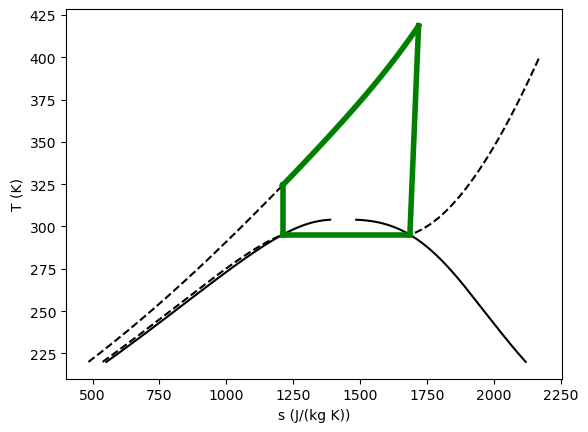

In [177]:
plt.figure()
plt.clf()
T = np.linspace(220, 400, 500) # range of temperatures
for P in [P1,P2]: #MPa
    S = [PropsSI('S','P',P,'T',t,fluid_ORC) for t in T]
    plt.plot(S, T, 'k--')
    
# saturated vapor and liquid entropy lines
Tsat = np.linspace(220, 304, 1000) # range of temperatures
svap = [PropsSI('S','T',t,'Q',1,fluid_ORC) for t in Tsat]
sliq = [PropsSI('S','T',t,'Q',0,fluid_ORC) for t in Tsat]

plt.plot(svap, Tsat, 'k-')
plt.plot(sliq, Tsat, 'k-')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')

plt.plot([s1, s2], [T1, T2], 'g-', lw=4) # Path 1 to 2

S23 = np.linspace(s2, s3)
T23 = [PropsSI('T','P',P2,'S',s,fluid_ORC) for s in S23]
plt.plot(S23,T23, 'g-', lw=4)

plt.plot([s3, s4], [T3, T4], 'g-', lw=4) # path from 3 to 4 

T41 = np.linspace(T4, T1) 
Q41 = np.linspace(Q4, Q1)
S41 = [PropsSI('S','P',P4,'Q',q,fluid_ORC) for q in Q41]
plt.plot(S41, T41, 'g-', lw=4) # and from 4 to 1 is isobaric

plt.savefig('carbonDioxide-rankine-TS.png')

#Tsat2 = np.linspace(200, 400, 1000) # range of temperatures
#plt.plot(svap, Tsat2, 'r-')
#plt.plot(sliq, Tsat2, 'r-')

In [188]:
W34_W = mdot_23_kgPerS*(h3 - h4); print(W34_W)
Q23_W = mdot_23_kgPerS*(h3 - h2)

W12_W = mdot_23_kgPerS*(h2 - h1); print(W12_W)

Q41_W = mdot_23_kgPerS*(h4 - h1); print(Q41_W)

610956.6358541474
234747.00097259926
1123790.3651184519


In [189]:
eta_ORC = (Q23_W - Q41_W)/Q23_W; print(eta_ORC)
eta_ORC_ = (W34_W - W12_W)/Q23_W; print(eta_ORC_)

0.2508064232543654
0.2508064232543654


In [190]:
W_EF_W = mdot_Air_kgPerS*(hE - hF); print(W_EF_W)

5739889.217447695


In [191]:
W_AB = mdot_Air_kgPerS*(hB - hA); print(W_AB)
W_CD = mdot_Air_kgPerS*(hD - hC); print(W_CD)

1166518.1737059914
1167236.2585641688


In [192]:
eta_Brayton = (W_EF_W - (W_AB + W_CD))/Qdot_DE_W; print(eta_Brayton)

0.4257668481471919


In [193]:
Wout_W = W_EF_W + W34_W

Win_W = W_AB + W_CD + W12_W

Qin_W = Qdot_DE_W

eta_total = (Wout_W - Win_W)/Qin_W; print(eta_total)

0.47279305250738546
